### If you have not installed statmanager-kr, follow the steps below. 

In [2]:
# If you have already installed statmanager-kr, do not run. Just skip. 
# If this not work, just trun on the terminal and enter pip install statmanager-kr 


pip install statmanager-kr

<hr>   

##### Before you start, make sure that you installed statmanager-kr and downloaded test data files via [github repository](https://github.com/ckdckd145/statmanager-kr).
##### If not, download a folder named ["testdata"](https://github.com/ckdckd145/statmanager-kr/tree/main/testdata).

##### If you need any more informations, click the link belows:   
[Korean ver](https://cslee145.notion.site/fd776d4f9a4f4c9db2cf1bbe60726971?v=3b2b237555fc4cd3a41a8da337d80c01&pvs=4)   
[English ver](https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4)   

<hr>

In [3]:
import pandas as pd                            # Don't forget to import pandas ! 
from statmanager import Stat_Manager           # importing statmanager-kr 

In [4]:
# making pandas.DataFrame 

df = pd.read_csv(r'testdata\testdf.csv', index_col = 'id') 
df

,condition,age,sex,location,income,prescore,postscore,fupscore
id,,,,,,,,
1,test_group,33,female,kor,237,7,10,5
2,test_group,26,female,kor,303,8,5,4
3,test_group,28,female,kor,327,2,4,2
4,test_group,25,female,usa,243,8,3,7
5,test_group,21,female,usa,409,2,10,4
6,test_group,39,male,usa,309,4,1,1
7,test_group,22,male,jpn,297,6,7,9
8,test_group,23,male,jpn,249,0,4,3
9,test_group,39,male,jpn,445,3,0,2


In [5]:
# making difference df 

df2 = pd.read_csv(r'testdata\testdf2.csv', index_col = 'id') 
df2

,condition,sex,age,height,income,prescore,postscore,job
id,,,,,,,,
1,test_group,male,27,168,230,9,8,police
2,sham_group,female,37,165,332,9,3,police
3,test_group,female,24,152,365,9,3,soldier
4,test_group,female,25,169,242,1,5,police
5,test_group,female,27,173,369,2,2,psychologist
...,...,...,...,...,...,...,...,...
96,sham_group,female,25,183,421,0,8,soldier
97,sham_group,female,25,151,214,5,5,police
98,sham_group,female,29,181,394,3,10,soldier


In [6]:
#making Stat_Manager() object

sm = Stat_Manager(df, language='eng') 

Stat_Manager object created successfully! (Version 1.8.0.0)

Method to check how to use: .howtouse()
Method for statistical analysis: .progress()
Method for changing language: .set_language()
Method for changing dataframe .change_dataframe()

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****



In [7]:
# method for searching about how to use analyses via statmanager-kr 
# feel free to enter any keyword that you interested

sm.howtouse() 

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****

In .howtouse(), enter the keywords you want to search for the analysis:

Example 1. If you want to know how to apply ANOVA, sm.howtouse("ANOVA")
Example 2. If you want to know how to test normality, sm.howtouse("normality")
Example 3. If you want to know how to test nonparametric, sm.howtouse("Non-parametric")

If you want to know how to filter your data, enter sm.howtouse("selector")! 

The table below summarizes the implementation methods for each statistical analysis method applied to statmanager-kr. 
 Search sm.howtouse("fgiure") for the function to draw pictures and graphs! 


,Purpose,method,vars,group_vars,posthoc
Analysis,,,,,
Kolmogorov-Smirnov Test,Check normality assumption,kstest,Variable to check for normality assumptions (str),NaN,NaN
Shapiro-Wilks Test,Check normality assumption,shapiro,Variable to check for normality assumptions (str),NaN,NaN
z-skeweness & z-kurtosis test,Check normality assumption,z_normal,Variable to check for normality assumptions (str),NaN,NaN
Levene Test,Check homoskedasticity assumption,levene,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
F-max Test,Check homoskedasticity assumption,fmax,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
Chi-Square Test,Cross-tabulation analysis,chi2_contingency,Variables to check for frequency differences (...,NaN,NaN
Fisher's Exact Test,Cross-tabulation analysis,fisher,Variables to check for frequency differences (...,NaN,NaN
Correlation analysis: Pearson r,Correlation analysis - Parametric test,pearsonr,Variables to check correlation (list),NaN,NaN
Correlation analysis: Spearman rho,Correlation analysis - Non-parametric test,spearmanr,Variables to check correlation (list),NaN,NaN


,method,vars,group_vars
Index,,,
Making P-P plot,pp_plot,variables to make P-P plot (str),NaN
Making Q-Q plot,qq_plot,variables to make Q-Q plot (str),NaN



The table below describes how selector parameters are utilized to filter data in .progress(). 



,mean,format of selector argument,pandas operator
python operator,,,
if a == b:,Only the data where a is b,{'a' : 'b'},df.loc['a' == 'b']
if a != b:,Only the data where a is NOT b,"{'a' : {'!=', 'b'} }",df.loc['a' != 'b']
if a > b:,Only the data with a > b,"{'a' : {'>', 'b'} }",df.loc['a' > 'b']
if a >= b:,Only the data with a >= b,"{'a' : {'>=', 'b'} }",df.loc['a' >= 'b']
if a < b:,Only the data with a < b,"{'a' : {'<', 'b'} }",df.loc['a' < 'b']
if a <= b:,Only the data with a <= b,"{'a' : {'<=', 'b'} }",df.loc['a' <= 'b']


In [8]:
# If you want to change language set as "KOREAN", run this cell. 
# This method can be used to change language set from "KOREAN" to "ENGLISH", of course. Just run sm.set_language('eng')

sm.set_language('kor') 

*****
언어 설정이 한글로 변경되었습니다.
*****



In [9]:
# Also, you can change dataframe 

sm.change_dataframe(df2)

데이터프레임 변경에 성공했습니다.



In [10]:
# If you want to progress analysis only to a filtered dataset under certain conditions, you can use the 'selector' parameter in the .progress()
# You can get information about how to use selector parameter, by running sm.howtouse('selector')

sm.howtouse('selector')

*****
↓↓ 상세한 정보는 Documentation link를 확인하세요! ↓↓
https://cslee145.notion.site/fd776d4f9a4f4c9db2cf1bbe60726971?v=3b2b237555fc4cd3a41a8da337d80c01&pvs=4 
*****



,의미,selector 인자 형식,pandas 식
python 식,,,
if a == b:,a가 b인 데이터만,{'a' : 'b'},df.loc['a' == 'b']
if a != b:,a가 b가 아닌 데이터만,"{'a' : {'!=', 'b'} }",df.loc['a' != 'b']
if a > b:,a가 b 초과인 데이터만,"{'a' : {'>', 'b'} }",df.loc['a' > 'b']
if a >= b:,a가 b 이상인 데이터만,"{'a' : {'>=', 'b'} }",df.loc['a' >= 'b']
if a < b:,a가 b 미만인 데이터만,"{'a' : {'<', 'b'} }",df.loc['a' < 'b']
if a <= b:,a가 b 이하인 데이터만,"{'a' : {'<=', 'b'} }",df.loc['a' <= 'b']


In [11]:
# Of course, .howtouse(), set_language(), .change_dataframe() methods all can be used as 'chain-method'

# if you want to change df and language
sm.change_dataframe(df).set_language('eng')#.progress()  <-- this is also possible 

데이터프레임 변경에 성공했습니다.

*****
The Language is set to ENGLISH.
*****



In [12]:
# For example, if you want to know whether mean differences between prescore and postscore is significant or not ONLY in the 'test_group', you can run .progress() like this
# This means that you run the dependent samples t-test only in the dataframe filtered by condition == test_group. 

sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'], selector = {'condition' : 'test_group'})


# If you want to delete that filtering condition, just delete selector argument and run again. Of course, it can be done with selector = None.
# sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'], selector = None)

*****
Note: Only data that meets the following conditions will be analyzed.
condition == test_group
*****

Dependent Samples T-test
Variables : prescore, postscore
n = 10
Descriptive analysis: 



,prescore,postscore
n,10.000,10.000
mean,4.000,5.000
median,3.500,4.500
std,3.091,3.367
min,0.000,0.000
max,8.000,10.000



Test statistic = -0.723, df(degree of freedom) = 9, p = 0.488
95% Confidence interval = [-4.127, 2.127]
Cohen's d = -0.309


In [13]:
#Independent Samples T-Test

sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex')

Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


sex,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


Test statistic = -0.304, degree of freedom = 28.0, p = 0.763
95% Confidence interval = [-5.153, 3.820]
Cohen's d = -0.111


In [14]:
# Independent Samples T-Test

sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex')

Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female' 'male']
Decriptive analysis: 


sex,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


Test statistic = -0.304, degree of freedom = 28.0, p = 0.763
95% Confidence interval = [-5.153, 3.820]
Cohen's d = -0.111


In [15]:
# kolmogorov-smirnov Test

sm.progress(method = 'kstest', vars = 'age')

Kolmogorov-Smirnov Test
Variable : age
n = 30
Test statistics = 1.000, p = 0.000

Conclusion: The normality assumption is not met.


In [16]:
# Levene test between 'sex'

sm.progress(method = 'levene', vars = 'age', group_vars = 'sex')

Group variable : sex
Comparison groups : ['female' 'male']
Test statistics = 1.957, p = 0.173

Conclusion : The homoskedasticity assumption is met


In [17]:
#Chi-squared test

sm.progress(method = 'chi2_contingency', vars = ['sex', 'location'])

Chi-Squared Test
Variables : sex, location

χ² = 13.000, p = 0.002
Contingency Table: 


location,jpn,kor,usa
sex,,,
female,0,9,6
male,9,3,3


Expected frequency contingency table: 
Percentage of cells with expected frequency less than 5 = 66.67%



location,jpn,kor,usa
sex,,,
female,4.5,6.0,4.5
male,4.5,6.0,4.5


In [18]:
#Correlation test - Pearson's r

sm.progress(method = 'pearsonr', vars = ['age', 'income', 'prescore', 'postscore'])

Correlation analysis: Pearson's r
n = 30
Note: Missing values are automatically deleted. 



,Pearson's r,p-value
age & income,-0.051,0.789
age & prescore,-0.044,0.816
age & postscore,-0.351,0.057
income & prescore,-0.103,0.588
income & postscore,0.051,0.789
prescore & postscore,-0.021,0.914


,age,income,prescore,postscore
age,1.000,-0.051,-0.044,-0.351
income,-0.051,1.000,-0.103,0.051
prescore,-0.044,-0.103,1.000,-0.021
postscore,-0.351,0.051,-0.021,1.000


* p < .05


In [19]:
# Calculating Cronbach's Alpha

sm.progress(method = 'cronbach', vars =['prescore', 'postscore', 'fupscore']) 

Calculating Cronbach's Alpha
Note: Missing values are automatically deleted. 

n = 30
Included items: prescore, postscore, fupscore (3)

Cronbach's alpha = 0.364



Bootstrap percentile method: Resampling No. = 10000 

95% confidence interval of prescore = [4.100, 6.133]
95% confidence interval of postscore = [3.233, 5.267]

The confidence intervals for the two distributions overlap. Therefore, the difference between the two distributions is not significant.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.



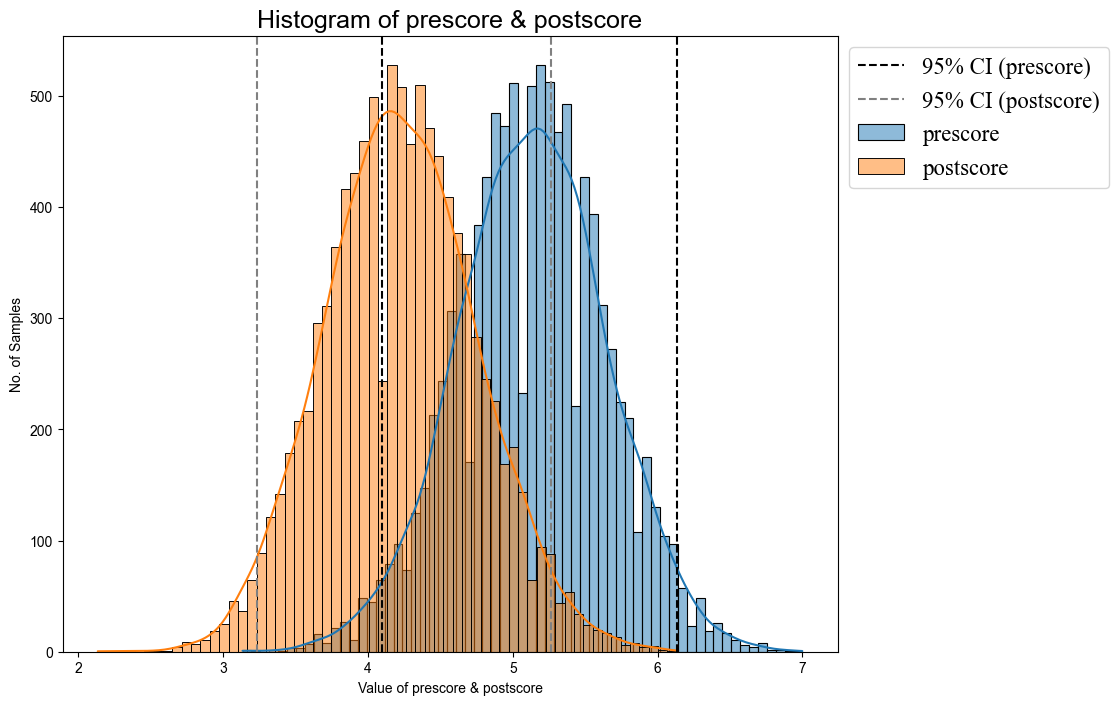

(<statmanager.making_figure.StatmanagerResult at 0x146ff618690>,
 <statmanager.making_figure.FigureInStatmanager at 0x146ff551f50>)

In [20]:
# Bootstrap percentile method 
# Specify the resampling number by appending it right after the 'bootstrap' you provide in the method argument. 
# For example, if you want to specify the number of resampling as 10000, your method argument will be 'bootstrap10000'
# If you want to run percentile method in the context of "within group", provide columns that you interested in 'vars' as 'list', such as vars = ['prescore', 'postscore']
# Absolutely, you can run percentile method in the context of "between groups". Just provide colume that you interested in 'vars' as 'str' and specify group variable by providing 'group_vars'


sm.progress(method = 'bootstrap10000', vars = ['prescore', 'postscore']) # --> "within group"
# sm.progress(method = 'bootstrap10000', vars = 'prescore', group_vars = 'sex') --> "betweeon group"

In [21]:
# One-way ANOVA without post-hoc test

sm.progress(method ='f_oneway', vars = 'age', group_vars = 'condition')

One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group' 'sham_group' 'control_group']
Decriptive analysis: 


condition,control_group,sham_group,test_group
n,10.000,10.000,10.00
mean,26.200,28.300,28.50
median,25.500,29.000,27.00
std,5.884,5.559,6.57
min,20.000,22.000,21.00
max,39.000,39.000,39.00


,sum_sq,df,F,p-value,partial eta squared
Intercept,6864.400,1.0,189.469,0.000,0.872
C(condition),32.467,2.0,0.448,0.644,0.004
Residual,978.200,27.0,NaN,NaN,0.124


In [22]:
# If you want to proceed posthoc analysis, just provide True in posthoc parameter

sm.progress(method ='f_oneway', vars = 'age', group_vars = 'condition', posthoc = True)

# Default setting of posthoc method is bonferroni correction. You can use Tukey HSD by providing 'tukey' in posthoc_method paramter. (default -> posthoc_method = 'bonf')
# sm.progress(method ='f_oneway', vars = 'age', group_vars = 'condition', posthoc = True, posthoc_method = 'tukey') 

One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group' 'sham_group' 'control_group']
Decriptive analysis: 


condition,control_group,sham_group,test_group
n,10.000,10.000,10.00
mean,26.200,28.300,28.50
median,25.500,29.000,27.00
std,5.884,5.559,6.57
min,20.000,22.000,21.00
max,39.000,39.000,39.00


,sum_sq,df,F,p-value,partial eta squared
Intercept,6864.400,1.0,189.469,0.000,0.872
C(condition),32.467,2.0,0.448,0.644,0.004
Residual,978.200,27.0,NaN,NaN,0.124


Posthoc: 


group1,group2,stat,pval,pval_corr,reject
control_group,sham_group,-0.8204,0.4227,1.0,False
control_group,test_group,-0.8246,0.4204,1.0,False
sham_group,test_group,-0.0735,0.9422,1.0,False


In [23]:
# 2-way repeated measures ANOVA
# If you proceed the posthoc analysis, it will compute every main-effect and interactions. You can see belows.

sm.progress(method = 'f_nway_rm', vars = ['prescore', 'postscore', 'fupscore'], group_vars = 'condition', posthoc = True)

2-way Mixed Repeated Measures ANOVA
Repeated measures factor : ['prescore', 'postscore', 'fupscore'] (time) 
Group factors : condition


Descripitive analysis: value by condition


,n,mean,median,std
condition,,,,
control_group,30,4.40,3.5,2.93
sham_group,30,4.87,4.0,2.54
test_group,30,4.47,4.0,2.96


Descripitive analysis: value by time


,n,mean,median,std
time,,,,
fupscore,30,4.37,4.0,2.62
postscore,30,4.23,4.0,2.91
prescore,30,5.13,5.5,2.85


Descripitive analysis: value by Interaction


n  mean  median   std
condition     time                             
control_group fupscore   10   3.7     3.0  2.79
              postscore  10   4.1     3.0  3.07
              prescore   10   5.4     5.0  2.95
sham_group    fupscore   10   5.0     4.0  2.58
              postscore  10   3.6     3.5  2.32
              prescore   10   6.0     6.0  2.36
test_group    fupscore   10   4.4     4.0  2.59
              postscore  10   5.0     4.5  3.37
              prescore   10   4.0     3.5  3.09

2-way Mixed Repeated Measures ANOVA Statistics:



,sum_sq,df,F,p-value,partial_eta_squared
Intercept,136.900,1.0,17.321,0.000,0.176
C(condition),8.467,2.0,0.536,0.587,0.013
C(time),15.800,2.0,1.000,0.373,0.024
C(condition):C(time),35.778,4.0,1.132,0.347,0.053
Residual,640.200,81.0,NaN,NaN,0.500



Posthoc test for main effect of condition


group1,group2,stat,pval,pval_corr,reject
control_group,sham_group,-0.6587,0.5127,1.0,False
control_group,test_group,-0.0877,0.9304,1.0,False
sham_group,test_group,0.5619,0.5764,1.0,False



Posthoc test for main effect of time


group1,group2,stat,pval,pval_corr,reject
fupscore,postscore,0.1866,0.8526,1.0,False
fupscore,prescore,-1.0849,0.2824,0.8473,False
postscore,prescore,-1.2106,0.231,0.6929,False


Posthoc test for interaction effect


group1,group2,stat,pval,pval_corr,reject
control_group_fupscore,control_group_postscore,-0.3048,0.764,1.0,False
control_group_fupscore,control_group_prescore,-1.3234,0.2023,1.0,False
control_group_fupscore,sham_group_fupscore,-1.0812,0.2939,1.0,False
control_group_fupscore,sham_group_postscore,0.0871,0.9315,1.0,False
control_group_fupscore,sham_group_prescore,-1.991,0.0619,1.0,False
control_group_fupscore,test_group_fupscore,-0.5813,0.5682,1.0,False
control_group_fupscore,test_group_postscore,-0.9401,0.3596,1.0,False
control_group_fupscore,test_group_prescore,-0.2278,0.8224,1.0,False
control_group_postscore,control_group_prescore,-0.9651,0.3473,1.0,False
control_group_postscore,sham_group_fupscore,-0.7093,0.4872,1.0,False


In [24]:
# Linear regression
# In this analysis, vars must be coded like this -> vars = ['dependent variable', ['independent variable1', 'independent variable2', ... ,]]
# Also, if you want to include categorical variables as independent variables, they must be dummy-coded, but this is not done automatically in current version. So, proceed aftering using other methods such as pd.get_dummies().

sm.progress(method = 'linearr', vars = ['age', ['income', 'prescore', 'postscore']])

Linear Regression

Dependent variable: age
Independent variable: ['income', 'prescore', 'postscore']
Note: Categorical independent variables are automatically dummy-coded. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.263
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.308
Time:                        13:47:02   Log-Likelihood:                -93.285
No. Observations:                  30   AIC:                             194.6
Df Residuals:                      26   BIC:                             200.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0632      4.781      6.707      0.000      22.237      41.890
income        -0.0025      0.012     -0.211      0.835      -0.027       0.022
prescore      -0.1152      0.382     -0.302      0.765      -0.900       0.669
postscore     -0.7102      0.372     -1.907      0.068      -1.476       0.055
==============================================================================
Omnibus:                        2.576   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.104
Skew:                           0.520   Prob(JB):                        0.349
Kurtosis:                       2.225   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.026   
Dependent Variable: age              AIC:                194.5705
Date:               2023-12-09 13:47 BIC:                200.1753
No. Observations:   30               Log-Likelihood:     -93.285 
Df Model:           3                F-statistic:        1.263   
Df Residuals:       26               Prob (F-statistic): 0.308   
R-squared:          0.127            Scale:              33.928  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         32.0632    4.7805   6.7070  0.0000  22.2366  41.8897
income        -0.0025    0.0121  -0.2107  0.8348  -0.0273   0.0222
prescore      -0.1152    0.3817  -0.3018  0.7652  -0.8997   0.6693
postscore     -0.7102    0.3724  -1.9070  0.0676  -1.4756   0.0553
-----------------------------------------------------------------
Omnibus:              2.576        Durbin-Watson:           2.274
Prob(Omnibus):        0.276        Jarque-Bera (JB):        2.104
Skew:                 0.520        Prob(JB):                0.349
Kurtosis:             2.225        Condition No.:           1471 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [25]:
# One-way ANCOVA
# In this analysis, vars must be coded like this -> vars = ['dependent variable', ['covariate1', 'covariate2'] ]. (Like regression)

sm.progress(method = 'oneway_ancova', vars = ['age', ['income']], group_vars = 'condition')

# You can also proceed posthoc test by providing posthoc = True. But this is not recommended because in ANCOVA, pair-comparison must be proceed for EMMeans. So instead, checking 'Pair-Coef Result Table' would be better. 

One-way ANCOVA

Dependent variable: age
Group variable : condition
Comparision groups : ['test_group' 'sham_group' 'control_group']
Covariates: ['income']
Descriptive analysis: 


control_group  sham_group  test_group
age    n               10.00       10.00       10.00
       mean            26.20       28.30       28.50
       median          25.50       29.00       27.00
       sd               5.88        5.56        6.57
income n               10.00       10.00       10.00
       mean           274.70      344.00      324.70
       median         243.00      357.50      306.00
       sd             103.02       82.67       77.34

OLS Model Result: 


Dep. Variable:,age,R-squared:,0.045
Model:,OLS,Adj. R-squared:,-0.065
Method:,Least Squares,F-statistic:,0.4065
Date:,"Sat, 09 Dec 2023",Prob (F-statistic):,0.750
Time:,13:47:02,Log-Likelihood:,-94.638
No. Observations:,30,AIC:,197.3
Df Residuals:,26,BIC:,202.9
Df Model:,3,,
Covariance Type:,nonrobust,,



ANCOVA statistics: 


,sum_sq,df,F,p-value,partial_eta_squared
Intercept,1754.330,1.0,47.248,0.000,0.645
C(condition),42.654,2.0,0.574,0.570,0.042
income,12.816,1.0,0.345,0.562,0.013
Residual,965.384,26.0,NaN,NaN,0.500


Pair-Coef Result Table: 
Note: If the regression coefficient (coef) of a pair is significant at the p < .05 level, it means that the difference between groups is significant despite controlling for covariates (['income']).
The regression coefficient (coef) reflects the difference in EMMeans. 


,coef,std err,t,p,0.025,0.975
Intercept,28.3416,4.123,6.874,0.000,19.866,36.817
control_group - sham_group,2.6403,2.876,0.918,0.367,-3.272,8.552
control_group - test_group,2.6898,2.805,0.959,0.346,-3.075,8.455
sham_group - test_group,0.0495,2.737,0.018,0.986,-5.577,5.676
income,-0.0078,0.013,-0.588,0.562,-0.035,0.019


<hr>

The function to create a figure or graph for statistical purposes will be updated continuously. For now, you can only temporarily create pp plots and qq plots. 

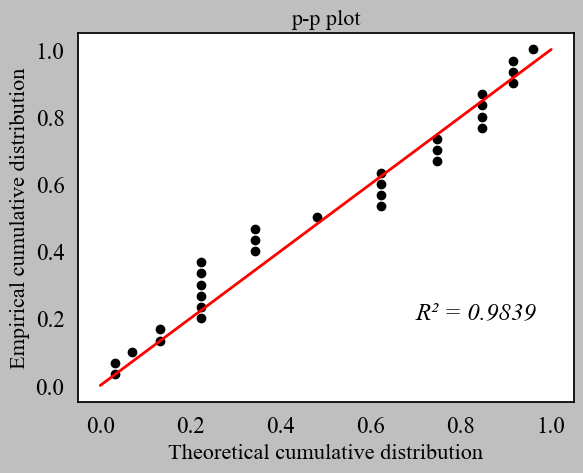

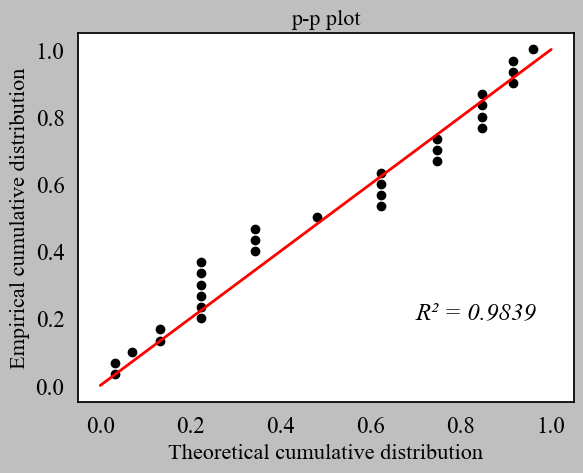

In [26]:
# If you want to make p-p plot, see examples below:

sm.progress(method = 'pp_plot', vars = 'prescore')

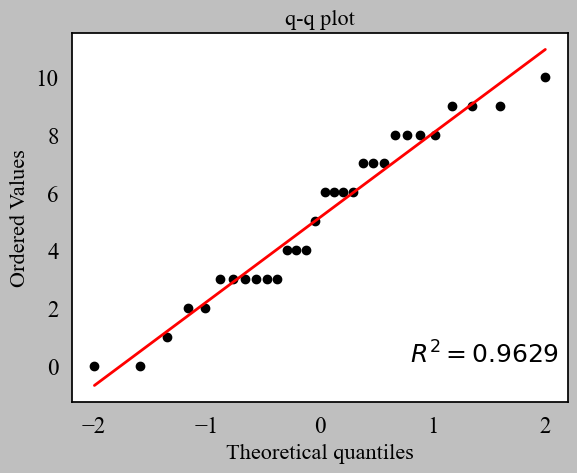

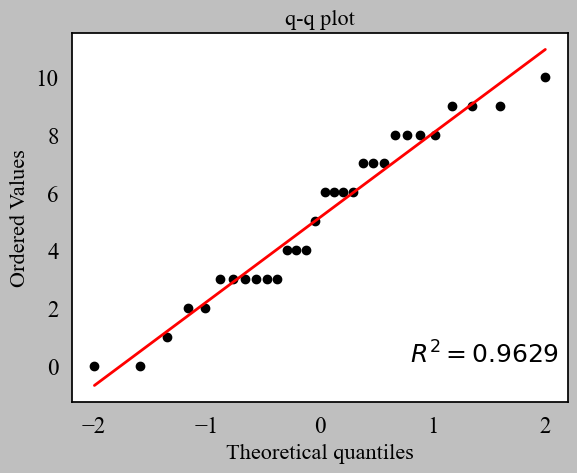

In [27]:
# If you want to make q-q plot, see examples below:

sm.progress(method = 'qq_plot', vars = 'prescore')

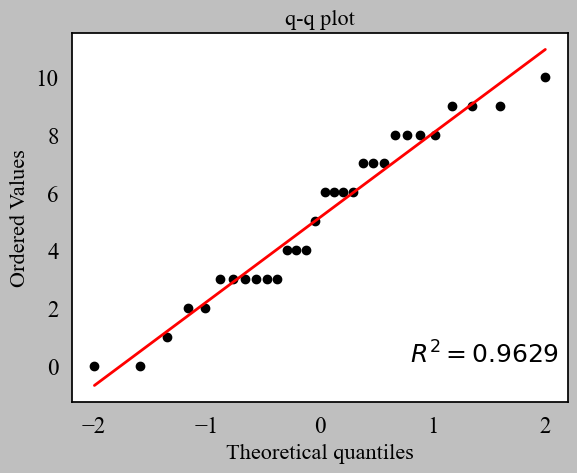

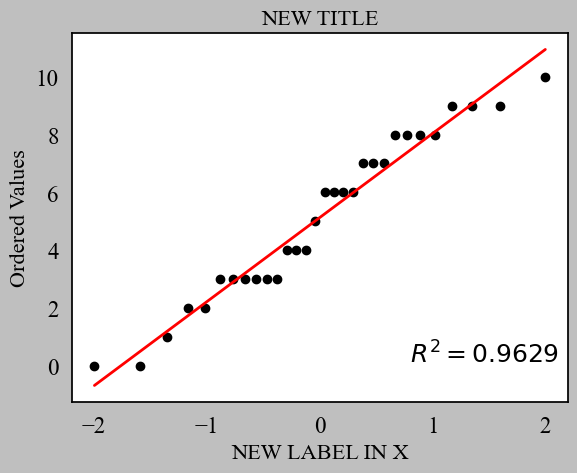

In [28]:
# By using the .revise() method by change methods, you can change the properties of the created figure. 
# See the example

sm.progress(method = 'qq_plot', vars = 'prescore').revise(title = 'NEW TITLE', xlabel = 'NEW LABEL IN X')